In [14]:
# Define the directory (which computer you're on)

# directory = r'C:\Users\drich - University of Victoria\Research'
directory = r'D:\OneDrive - University of Victoria\Research'

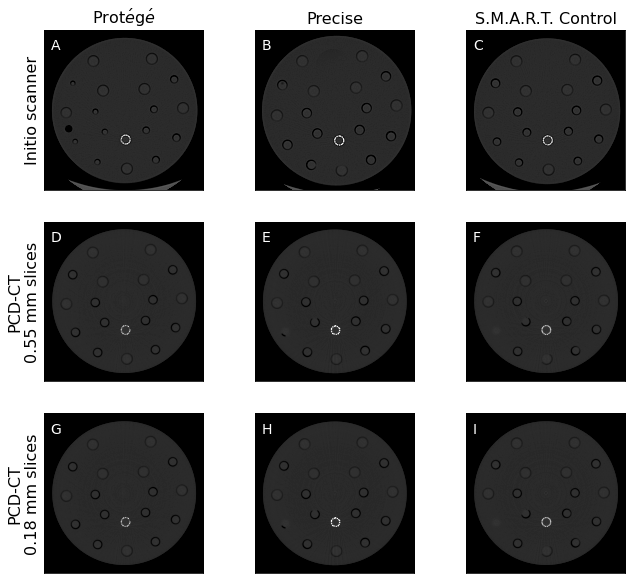

In [44]:
# Figure showing all CT images for all of the stents

import os
import numpy as np
import pydicom as pyd
import matplotlib.pyplot as plt
from glob import glob
from natsort import natural_keys

# Type of acquisition folder
clin_dir = 'Clinical CT'
pcd_dir = 'LDA Data'

# Specific folder defining the day
clin_folder = '22_09_20_CT_stents'
pcd_folder = '22_09_07_CT_stents'

append = '_intitio_8'

# Slice to show
pcd_slice = 12
# clin_slice = 140

clin_path = os.path.join(directory, clin_dir, clin_folder, '10cm_phantom')
pcd_path = os.path.join(directory, pcd_dir, pcd_folder)

# Grab the high-res PCD data and select the correct bin and slice
red_pcd = np.load(os.path.join(pcd_path, 'red_mid', 'Norm CT', 'CT_FDK_initio.npy'))[-1, 10]
purple_pcd = np.load(os.path.join(pcd_path, 'purple_mid', 'Norm CT', 'CT_FDK_initio.npy'))[-1, 7]
pink_pcd = np.load(os.path.join(pcd_path, 'pink_mid', 'Norm CT', 'CT_FDK_initio.npy'))[-1, 10]

# Grab the lower-res PCD data and select the correct bin and slice
red_pcd_low = np.load(os.path.join(pcd_path, 'red_mid', 'Norm CT', 'CT_FDK_initio_8.npy'))[-1, 3]
purple_pcd_low = np.load(os.path.join(pcd_path, 'purple_mid', 'Norm CT', 'CT_FDK_initio_8.npy'))[-1, 2]
pink_pcd_low = np.load(os.path.join(pcd_path, 'pink_mid', 'Norm CT', 'CT_FDK_initio_8.npy'))[-1, 3]

# Organize the clinical files in numerical order
red_clin_files = glob(os.path.join(clin_path, 'red', 'Data', '*.dcm'))
red_clin_files.sort(key=natural_keys)
purple_clin_files = glob(os.path.join(clin_path, 'purple', 'Data', '*.dcm'))
purple_clin_files.sort(key=natural_keys)
pink_clin_files = glob(os.path.join(clin_path, 'pink', 'Data', '*.dcm'))
pink_clin_files.sort(key=natural_keys)


# Select the correct slice in the clinical data
red_clin = pyd.dcmread(red_clin_files[134])
purple_clin = pyd.dcmread(purple_clin_files[140])
pink_clin = pyd.dcmread(pink_clin_files[135])

# print(red_clin)
# print()
# print()
# print(purple_clin)
# print()
# print()
# print(pink_clin)

red_clin = np.array(red_clin.pixel_array)[25:-30, 25:-30] * red_clin.RescaleSlope + red_clin.RescaleIntercept
purple_clin = np.array(purple_clin.pixel_array)[30:-30,
              30:-30] * purple_clin.RescaleSlope + purple_clin.RescaleIntercept
pink_clin = np.array(pink_clin.pixel_array)[35:-35, 45:-30] * pink_clin.RescaleSlope + pink_clin.RescaleIntercept

# Set up the figure
ct_fig, ax = plt.subplots(3, 3, figsize=(11, 10))
ax[0, 0].set_xticks([])
ax[0, 0].set_yticks([])
ax[0, 1].set_xticks([])
ax[0, 1].set_yticks([])
ax[0, 2].set_xticks([])
ax[0, 2].set_yticks([])
ax[1, 0].set_xticks([])
ax[1, 0].set_yticks([])
ax[1, 1].set_xticks([])
ax[1, 1].set_yticks([])
ax[1, 2].set_xticks([])
ax[1, 2].set_yticks([])
ax[2, 0].set_xticks([])
ax[2, 0].set_yticks([])
ax[2, 1].set_xticks([])
ax[2, 1].set_yticks([])
ax[2, 2].set_xticks([])
ax[2, 2].set_yticks([])

vmax = 2500
vmin = -600
ax[0, 0].imshow(red_clin, cmap='gray', vmin=vmin, vmax=vmax)
ax[0, 1].imshow(purple_clin, cmap='gray', vmin=vmin, vmax=vmax)
ax[0, 2].imshow(pink_clin, cmap='gray', vmin=vmin, vmax=vmax)
ax[1, 0].imshow(red_pcd_low, cmap='gray', vmin=vmin, vmax=vmax)
ax[1, 1].imshow(purple_pcd_low, cmap='gray', vmin=vmin, vmax=vmax)
ax[1, 2].imshow(pink_pcd_low, cmap='gray', vmin=vmin, vmax=vmax)
ax[2, 0].imshow(red_pcd, cmap='gray', vmin=vmin, vmax=vmax)
ax[2, 1].imshow(purple_pcd, cmap='gray', vmin=vmin, vmax=vmax)
ax[2, 2].imshow(pink_pcd, cmap='gray', vmin=vmin, vmax=vmax)


ax[0, 0].set_title(r'Prot$\acute{e}$g$\acute{e}$', fontsize=16)
ax[0, 1].set_title('Precise', fontsize=16)
ax[0, 2].set_title('S.M.A.R.T. Control', fontsize=16)

ax[0, 0].set_ylabel('Initio scanner', fontsize=16)
ax[1, 0].set_ylabel('PCD-CT\n0.55 mm slices', fontsize=16)
ax[2, 0].set_ylabel('PCD-CT\n0.18 mm slices', fontsize=16)

ax[0, 0].annotate('A', (7, 140), xycoords='axes points', color='white', fontsize=14)
ax[0, 1].annotate('B', (7, 140), xycoords='axes points', color='white', fontsize=14)
ax[0, 2].annotate('C', (7, 140), xycoords='axes points', color='white', fontsize=14)
ax[1, 0].annotate('D', (7, 140), xycoords='axes points', color='white', fontsize=14)
ax[1, 1].annotate('E', (7, 140), xycoords='axes points', color='white', fontsize=14)
ax[1, 2].annotate('F', (7, 140), xycoords='axes points', color='white', fontsize=14)
ax[2, 0].annotate('G', (7, 140), xycoords='axes points', color='white', fontsize=14)
ax[2, 1].annotate('H', (7, 140), xycoords='axes points', color='white', fontsize=14)
ax[2, 2].annotate('I', (7, 140), xycoords='axes points', color='white', fontsize=14)

plt.subplots_adjust(wspace=0.1)
# ct_fig.savefig(rf'D:\OneDrive - University of Victoria\Files\Grad School\Manuscripts\Stents\Figures_initio\CT_fig{append}.png', dpi=500)
# ct_fig.savefig(rf'D:\OneDrive - University of Victoria\Files\Grad School\Manuscripts\Stents\Figures_initio\CT_fig{append}.eps', dpi=500)'


In [ ]:
# 3D volume figure

import os
import numpy as np
import pydicom as pyd
import matplotlib.pyplot as plt
from glob import glob
import pyvista as pv

# Define the directory (which computer you're on)
# directory = r'C:\Users\drich - University of Victoria\Research'
directory = r'D:\OneDrive - University of Victoria\Research'

# Type of acquisition folder
clin_dir = 'Clinical CT'
pcd_dir = 'LDA Data'

append = '_initio'

# Specific folder defining the day
clin_folder = '22_09_20_CT_stents'
pcd_folder = '22_09_07_CT_stents'

clin_path = os.path.join(directory, clin_dir, clin_folder, '10cm_phantom')
pcd_path = os.path.join(directory, pcd_dir, pcd_folder)

# Grab the high_res PCD vtk stent data
red_pcd = pv.read(os.path.join(pcd_path, 'red_mid', 'nrrd', 'stent_transposed.vtk'))
purple_pcd = pv.read(os.path.join(pcd_path, 'purple_mid', 'nrrd', 'stent_transposed.vtk'))
pink_pcd = pv.read(os.path.join(pcd_path, 'pink_mid', 'nrrd', 'stent_transposed.vtk'))

# Grab the low_res PCD vtk stent data
red_pcd_low = pv.read(os.path.join(pcd_path, 'red_mid', 'nrrd', 'stent_initio.vtk'))
purple_pcd_low = pv.read(os.path.join(pcd_path, 'purple_mid', 'nrrd', 'stent_initio.vtk'))
pink_pcd_low = pv.read(os.path.join(pcd_path, 'pink_mid', 'nrrd', 'stent_initio.vtk'))

# Grab the clinical vtk stent data
red_clin = pv.read(os.path.join(clin_path, 'red', 'stent_HD_clip.vtk'))
purple_clin = pv.read(os.path.join(clin_path, 'purple', 'stent_HD_clip.vtk'))
pink_clin = pv.read(os.path.join(clin_path, 'pink', 'stent_HD_clip.vtk'))

# Set up the figure
fig_3d, ax = plt.subplots(3, 3, figsize=(12, 10))
ax[0, 0].set_xticks([])
ax[0, 0].set_yticks([])
ax[0, 1].set_xticks([])
ax[0, 1].set_yticks([])
ax[0, 2].set_xticks([])
ax[0, 2].set_yticks([])
ax[1, 0].set_xticks([])
ax[1, 0].set_yticks([])
ax[1, 1].set_xticks([])
ax[1, 1].set_yticks([])
ax[1, 2].set_xticks([])
ax[1, 2].set_yticks([])
ax[2, 0].set_xticks([])
ax[2, 0].set_yticks([])
ax[2, 1].set_xticks([])
ax[2, 1].set_yticks([])
ax[2, 2].set_xticks([])
ax[2, 2].set_yticks([])

pl = pv.Plotter(off_screen=True)
_ = pl.add_mesh(red_clin, smooth_shading=True)
img = pl.screenshot(None, return_img=True)
pl.close()

ax[0, 0].imshow(img)

pl = pv.Plotter(off_screen=True)
_ = pl.add_mesh(purple_clin, smooth_shading=True)
img = pl.screenshot(None, return_img=True)
pl.close()

ax[0, 1].imshow(img)

pl = pv.Plotter(off_screen=True)
_ = pl.add_mesh(pink_clin, smooth_shading=True)
img = pl.screenshot(None, return_img=True)
pl.close()

ax[0, 2].imshow(img)

pl = pv.Plotter(off_screen=True)
_ = pl.add_mesh(red_pcd_low, smooth_shading=True)
img = pl.screenshot(None, return_img=True)
pl.close()

ax[1, 0].imshow(img)

pl = pv.Plotter(off_screen=True)
_ = pl.add_mesh(purple_pcd_low, smooth_shading=True)
img = pl.screenshot(None, return_img=True)
pl.close()

ax[1, 1].imshow(img)

pl = pv.Plotter(off_screen=True)
_ = pl.add_mesh(pink_pcd_low, smooth_shading=True)
img = pl.screenshot(None, return_img=True)
pl.close()

ax[1, 2].imshow(img)

pl = pv.Plotter(off_screen=True)
_ = pl.add_mesh(red_pcd, smooth_shading=True)
img = pl.screenshot(None, return_img=True)
pl.close()

ax[2, 0].imshow(img)

pl = pv.Plotter(off_screen=True)
_ = pl.add_mesh(purple_pcd, smooth_shading=True)
img = pl.screenshot(None, return_img=True)
pl.close()

ax[2, 1].imshow(img)

pl = pv.Plotter(off_screen=True)
_ = pl.add_mesh(pink_pcd, smooth_shading=True)
img = pl.screenshot(None, return_img=True)
pl.close()

ax[2, 2].imshow(img)

ax[0, 0].set_title(r'Prot$\acute{e}$g$\acute{e}$', fontsize=16)
ax[0, 1].set_title('Precise', fontsize=16)
ax[0, 2].set_title('S.M.A.R.T. Control', fontsize=16)

ax[0, 0].set_ylabel('Initio scanner', fontsize=16)
ax[1, 0].set_ylabel('PCD-CT\n0.55 mm slices', fontsize=16)
ax[2, 0].set_ylabel('PCD-CT\n0.18 mm slices', fontsize=16)

ax[0, 0].annotate('A', (7, 140), xycoords='axes points', color='white', fontsize=14)
ax[0, 1].annotate('B', (7, 140), xycoords='axes points', color='white', fontsize=14)
ax[0, 2].annotate('C', (7, 140), xycoords='axes points', color='white', fontsize=14)
ax[1, 0].annotate('D', (7, 140), xycoords='axes points', color='white', fontsize=14)
ax[1, 1].annotate('E', (7, 140), xycoords='axes points', color='white', fontsize=14)
ax[1, 2].annotate('F', (7, 140), xycoords='axes points', color='white', fontsize=14)
ax[2, 0].annotate('G', (7, 140), xycoords='axes points', color='white', fontsize=14)
ax[2, 1].annotate('H', (7, 140), xycoords='axes points', color='white', fontsize=14)
ax[2, 2].annotate('I', (7, 140), xycoords='axes points', color='white', fontsize=14)

plt.subplots_adjust(wspace=0.1)
# fig_3d.savefig(rf'D:\OneDrive - University of Victoria\Files\Grad School\Manuscripts\Stents\Figures_initio\3D_fig{append}.png', dpi=500)
# fig_3d.savefig(rf'D:\OneDrive - University of Victoria\Files\Grad School\Manuscripts\Stents\Figures_initio\3D_fig{append}.eps', dpi=500)


In [ ]:
# Best bin figure

import os
import numpy as np
import pydicom as pyd
import matplotlib.pyplot as plt
from glob import glob
from natsort import natural_keys
import matplotlib.colors as colors

# Type of acquisition folder
clin_dir = 'Clinical CT'
pcd_dir = 'LDA Data'

# Specific folder defining the day
clin_folder = '22_09_20_CT_stents'
pcd_folder = '22_09_07_CT_stents'

append = '_initio_8'

# The best bin
best_bin = 4

# Slice to show
pcd_slice = 3
clin_slice = 135

clin_path = os.path.join(directory, clin_dir, clin_folder, '10cm_phantom')
pcd_path = os.path.join(directory, pcd_dir, pcd_folder)

# Grab the PCD data and select the correct bin and slice
pink_pcd = np.load(os.path.join(pcd_path, 'pink_mid', 'Norm CT', f'CT_FDK{append}.npy'))[-1, pcd_slice]
pink_bin = np.load(os.path.join(pcd_path, 'pink_mid', 'Norm CT', f'CT_FDK{append}.npy'))[best_bin, pcd_slice]

# Organize the clinical files in numerical order
pink_clin_files = glob(os.path.join(clin_path, 'pink', 'Data', '*.dcm'))
pink_clin_files.sort(key=natural_keys)

# Select the correct slice in the clinical data
pink_clin = pyd.dcmread(pink_clin_files[clin_slice])

# Get the pixel and zoom in on the phantom (with scaling)
# pink_clin = np.array(pink_clin.pixel_array)[90:310, 140:360] * pink_clin.RescaleSlope + pink_clin.RescaleIntercept
pink_clin = np.array(pink_clin.pixel_array)[35:-35, 45:-30] * pink_clin.RescaleSlope + pink_clin.RescaleIntercept

# Set up the figure
bin_fig, ax = plt.subplots(1, 3, figsize=(11, 4))
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].set_xticks([])
ax[2].set_yticks([])

vmax = 2500
vmin = -600
ax[0].imshow(pink_clin, cmap='gray', vmin=vmin, vmax=vmax, interpolation='nearest')
ax[1].imshow(pink_pcd, cmap='gray', vmin=vmin, vmax=vmax, interpolation='nearest')
ax[2].imshow(pink_bin, cmap='gray', vmin=vmin, vmax=vmax, interpolation='nearest')

ax[0].set_title('Clinical', fontsize=16)
ax[1].set_title('PCD-CT (35-120 keV)', fontsize=16)
ax[2].set_title(f'PCD-CT (95-120 keV)', fontsize=16)

ax[0].annotate('A', (7, 163), xycoords='axes points', color='white', fontsize=14)
ax[1].annotate('B', (7, 163), xycoords='axes points', color='white', fontsize=14)
ax[2].annotate('C', (7, 163), xycoords='axes points', color='white', fontsize=14)

# plt.subplots_adjust(wspace=0.1)
bin_fig.savefig(fr'D:\OneDrive - University of Victoria\Files\Grad School\Manuscripts\Stents\Figures_initio\BestBin_{best_bin}_fig{append}.png', dpi=500)
# bin_fig.savefig(fr'D:\OneDrive - University of Victoria\Files\Grad School\Manuscripts\Stents\Figures_initio\BestBin_{best_bin}_fig{append}.eps', dpi=500)


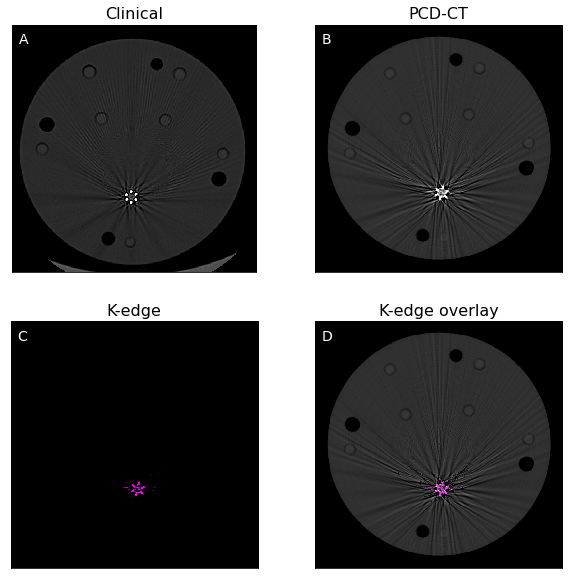

In [16]:
# K-edge figure

# Figure comparing the K-edge to the clinical and the full-bin PCD CT
import os
import numpy as np
import pydicom as pyd
import matplotlib.pyplot as plt
from glob import glob
from natsort import natural_keys
import matplotlib.colors as colors

# Type of acquisition folder
clin_dir = 'Clinical CT'
pcd_dir = 'LDA Data'

# Specific folder defining the day
clin_folder = '22_09_20_CT_stents'
pcd_folder = '22_09_07_CT_stents'

append = '_initio_8'

# Slice to show
pcd_slice = 5
clin_slice = 158

clin_path = os.path.join(directory, clin_dir, clin_folder, '10cm_phantom')
pcd_path = os.path.join(directory, pcd_dir, pcd_folder)

# Grab the PCD data and select the correct bin and slice
pink_pcd = np.load(os.path.join(pcd_path, 'pink_bottom', 'Norm CT', f'CT_FDK{append}.npy'))[-1, pcd_slice]
pink_kedge = np.load(os.path.join(pcd_path, 'pink_bottom', 'CT', f'KDA_Ta_FDK{append}.npy'))[pcd_slice]

# Organize the clinical files in numerical order
pink_clin_files = glob(os.path.join(clin_path, 'pink', 'Data', '*.dcm'))
pink_clin_files.sort(key=natural_keys)

# Select the correct slice in the clinical data
pink_clin = pyd.dcmread(pink_clin_files[clin_slice])

# Get the pixel and zoom in on the phantom (with scaling)
# pink_clin = np.array(pink_clin.pixel_array)[90:310, 140:360] * pink_clin.RescaleSlope + pink_clin.RescaleIntercept

pink_clin = np.array(pink_clin.pixel_array)[35:-35, 45:-30] * pink_clin.RescaleSlope + pink_clin.RescaleIntercept

# Create the colormaps
nbins = 100
c1 = (1, 0, 1)

black_val = 0
black_list = (black_val, black_val, black_val)

c1_rng = [black_list, c1]
cmap1 = colors.LinearSegmentedColormap.from_list('Purp', c1_rng, N=nbins)  # From black to purple

gray_val = 0.34
gray_list = (gray_val, gray_val, gray_val)

cmap2 = colors.LinearSegmentedColormap.from_list('1ab', [gray_list, c1], N=nbins)  # From gray to purple
cmap2.set_bad('white', alpha=0)
cmap2.set_over(c1, alpha=1)

# Set up the figure
kedge_fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].set_xticks([])
ax[0, 0].set_yticks([])
ax[0, 1].set_xticks([])
ax[0, 1].set_yticks([])
ax[1, 0].set_xticks([])
ax[1, 0].set_yticks([])
ax[1, 1].set_xticks([])
ax[1, 1].set_yticks([])

vmax = 2500
vmin = -600

ax[0, 0].imshow(np.fliplr(pink_clin), cmap='gray', vmin=vmin, vmax=vmax, interpolation='nearest')
ax[0, 1].imshow(pink_pcd, cmap='gray', vmin=vmin, vmax=vmax, interpolation='nearest')
ax[1, 0].imshow(pink_kedge, cmap=cmap1, vmin=0.001, vmax=0.003, interpolation='nearest')

pink_kedge[pink_kedge < 0.001] = np.nan

ax[1, 1].imshow(pink_pcd, cmap='gray', vmin=vmin, vmax=vmax, interpolation='nearest')
ax[1, 1].imshow(pink_kedge, cmap=cmap1, vmin=0.001, vmax=0.003, interpolation='nearest', alpha=0.8)

ax[0, 0].set_title('Clinical', fontsize=16)
ax[0, 1].set_title('PCD-CT', fontsize=16)
ax[1, 0].set_title('K-edge', fontsize=16)
ax[1, 1].set_title('K-edge overlay', fontsize=16)

ax[0, 0].annotate('A', (7, 228), xycoords='axes points', color='white', fontsize=14)
ax[0, 1].annotate('B', (7, 228), xycoords='axes points', color='white', fontsize=14)
ax[1, 0].annotate('C', (7, 228), xycoords='axes points', color='white', fontsize=14)
ax[1, 1].annotate('D', (7, 228), xycoords='axes points', color='white', fontsize=14)


# plt.subplots_adjust(wspace=0.1)
kedge_fig.savefig(rf'D:\OneDrive - University of Victoria\Files\Grad School\Manuscripts\Stents\Figures_initio\Kedge_fig{append}.png', dpi=500)
# kedge_fig.savefig(rf'D:\OneDrive - University of Victoria\Files\Grad School\Manuscripts\Stents\Figures_initio\Kedge_fig{append}.eps', dpi=500)